## Question 1

When multiplying a
(
n
×
k
)
(n×k) matrix with a
(
k
×
m
)
(k×m) matrix, the result is a
(
n
×
m
)
(n×m) matrix. Each element in the resulting matrix is obtained by taking the dot product of a row from the first matrix and a column from the second. This involves
k
k multiplications and
k
−
1
k−1 additions for each element. Since there are
n
×
m
n×m such elements, the total number of operations required is
n
×
m
×
k
n×m×k multiplications and
n
×
m
×
(
k
−
1
)
n×m×(k−1) additions.

## Question 2

In [ ]:
rows_A,shared_dim,cols_B=3,4,2
matrix_A=[[1 for _ in range(shared_dim)]for _ in range(rows_A)]
matrix_B=[[2 for _ in range(cols_B)]for _ in range(shared_dim)]
def multiply_matrices(mat1,mat2):
    result=[[0 for _ in range(cols_B)]for _ in range(rows_A)]
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(shared_dim):
                result[i][j]+=mat1[i][k]*mat2[k][j]
    return result
product_lists=multiply_matrices(matrix_A,matrix_B)
print("Result using lists:")
for row in product_lists:print(row)
import numpy as np
array_A = np.array(matrix_A)
array_B = np.array(matrix_B)
product_numpy = np.dot(array_A, array_B)
print("\nResult using NumPy:")
print(product_numpy)

Result using lists:
[8, 8]
[8, 8]
[8, 8]

Result using NumPy:
[[8 8]
 [8 8]
 [8 8]]


##### NumPy is significantly faster because it uses optimized libraries under the hood, avoids Python loop overhead, and takes advantage of hardware acceleration.

## Question 3

##### It takes O(n) time to find the highest element in a list because it only requires one run over the data. Finding the second-highest requires first removing the highest from one pass, then finding the highest in the remaining list in a second pass. Thus, the total number of passes two, but the complexity is still O(n). To use this concept to finding the median, we would  look for the smallest element until we got to the middle of the list. Because each pass is O(n), this means that we would perform around n/2 passes, making the overall time complexity O(n²), which is useless for big lists.
##### Finding the median can be done more quickly by sorting the list first, which takes O(n log n) time, and then selecting the middle member, which is an O(1) process. Based on QuickSort's partitioning mechanism, the Quickselect algorithm provides an even faster option on average. It can determine the median in O(n) time without sorting the list all the way through.

In [ ]:
import time
import random
import numpy as np

size=2000
numbers=[random.randint(0,10000) for _ in range(size)]

def median_naive(nums):
    data=nums.copy()
    n=len(data)
    middle=n//2
    for _ in range(middle):
        smallest=min(data)
        data.remove(smallest)
    if n%2==1:
        return min(data)
    else:
        first=min(data)
        data.remove(first)
        second=min(data)
        return (first+second)/2

def median_sort(nums):
    data=sorted(nums)
    n=len(data)
    if n%2==1:
        return data[n//2]
    else:
        return (data[n//2-1]+data[n//2])/2

start=time.time()
median_naive(numbers)
print("Naive passes method:",round(time.time()-start,6),"seconds")

start=time.time()
median_sort(numbers)
print("Sort method:",round(time.time()-start,6),"seconds")

start=time.time()
np.median(numbers)
print("NumPy median:",round(time.time()-start,6),"seconds")

Naive passes method: 0.076763 seconds
Sort method: 0.000592 seconds
NumPy median: 0.000821 seconds


## Question 4



##### f(x,y)=(2xy + y^2 *  cos(x),x^2 + 3y^2 * sin(x))

## Question 5

In [ ]:
import jax, jax.numpy as jnp, numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def grad_analytical(x, y):
    return 2*x*y + y**3 * jnp.cos(x), x**2 + 3*y**2 * jnp.sin(x)

f_grad = jax.grad(lambda v: f(v[0], v[1]))

for _ in range(5):
    x, y = np.random.uniform(-3, 3), np.random.uniform(-3, 3)
    g_auto = f_grad(jnp.array([x, y]))
    g_manual = grad_analytical(x, y)
    print(f"x={x:.3f}, y={y:.3f}")
    print(f"Analytical: {g_manual}")
    print(f"JAX:        {g_auto}\n")


x=0.950, y=-2.242
Analytical: (Array(-10.816739, dtype=float32, weak_type=True), Array(13.174551, dtype=float32, weak_type=True))
JAX:        [-10.816738  13.17455 ]

x=1.368, y=-1.916
Analytical: (Array(-6.660157, dtype=float32, weak_type=True), Array(12.666305, dtype=float32, weak_type=True))
JAX:        [-6.660157 12.666304]

x=-1.128, y=0.463
Analytical: (Array(-1.0018054, dtype=float32, weak_type=True), Array(0.6930706, dtype=float32, weak_type=True))
JAX:        [-1.0018053  0.6930705]

x=-1.249, y=-1.066
Analytical: (Array(2.279622, dtype=float32, weak_type=True), Array(-1.6773131, dtype=float32, weak_type=True))
JAX:        [ 2.279622  -1.6773134]

x=0.122, y=-0.431
Analytical: (Array(-0.18478489, dtype=float32, weak_type=True), Array(0.08280062, dtype=float32, weak_type=True))
JAX:        [-0.18478489  0.08280062]



## Question 6

In [ ]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2*y + y**3*sp.sin(x)
g_sym = [sp.diff(f, x), sp.diff(f, y)]
g_man = [2*x*y + y**3*sp.cos(x), x**2 + 3*y**2*sp.sin(x)]
print(g_sym)
print(g_man)
print(sp.simplify(g_sym[0]-g_man[0]) == 0 and sp.simplify(g_sym[1]-g_man[1]) == 0)


[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]
[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]
True


## Question 7

In [ ]:
students_data = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            }
        },
        "Branch 2": {}
    },
    2023: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {}
    }
}

print(students_data[2022]["Branch 1"][1]["Marks"]["Maths"])


100


## Question 8

In [ ]:
class Marks:
    def __init__(self, **subjects):
        self.subjects = subjects

    def __repr__(self):
        return str(self.subjects)

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Roll: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"{self.name}: {self.students}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"{self.year}: {self.branches}"

database = []

year_2022 = Year(2022)

branch1 = Branch("Branch 1")
branch1.add_student(Student(1, "N", Marks(Maths=100, English=70)))
branch1.add_student(Student(2, "Bob", Marks(Maths=85, English=90)))

branch2 = Branch("Branch 2")
branch2.add_student(Student(3, "Charlie", Marks(Maths=92, English=88)))

year_2022.add_branch(branch1)
year_2022.add_branch(branch2)

database.append(year_2022)
database.append(Year(2023))
database.append(Year(2024))
database.append(Year(2025))

for year in database:
    print(year)


2022: [Branch 1: [Roll: 1, Name: N, Marks: {'Maths': 100, 'English': 70}, Roll: 2, Name: Bob, Marks: {'Maths': 85, 'English': 90}], Branch 2: [Roll: 3, Name: Charlie, Marks: {'Maths': 92, 'English': 88}]]
2023: []
2024: []
2025: []


## Question 9

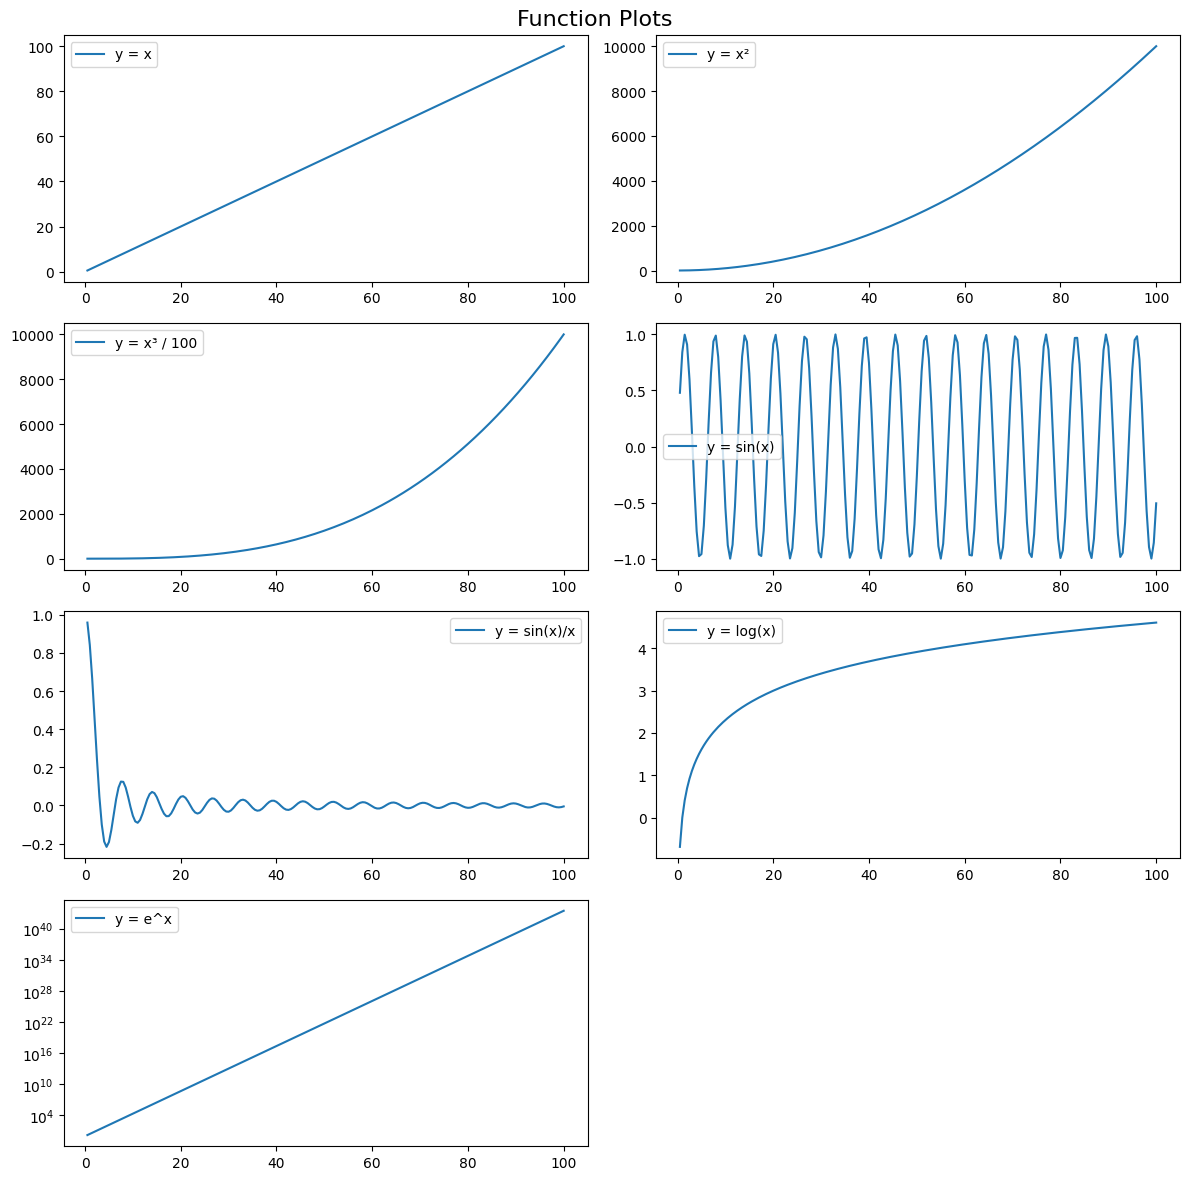

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.0 + 0.5, 0.5)

y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

fig, axs = plt.subplots(4, 2, figsize=(12, 12))
fig.suptitle("Function Plots", fontsize=16)

axs[0, 0].plot(x, y1, label="y = x")
axs[0, 0].legend()

axs[0, 1].plot(x, y2, label="y = x²")
axs[0, 1].legend()

axs[1, 0].plot(x, y3, label="y = x³ / 100")
axs[1, 0].legend()

axs[1, 1].plot(x, y4, label="y = sin(x)")
axs[1, 1].legend()

axs[2, 0].plot(x, y5, label="y = sin(x)/x")
axs[2, 0].legend()

axs[2, 1].plot(x, y6, label="y = log(x)")
axs[2, 1].legend()

axs[3, 0].plot(x, y7, label="y = e^x")
axs[3, 0].set_yscale('log')
axs[3, 0].legend()

axs[3, 1].axis("off")

plt.tight_layout()
plt.show()


## Question 10

In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

col_highest_std = df.std().idxmax()
highest_std_value = df.std().max()

row_lowest_mean_idx = df.mean(axis=1).idxmin()
row_lowest_mean_value = df.mean(axis=1).min()

print("DataFrame:\n", df, "\n")
print(f"Column with highest standard deviation: '{col_highest_std}' (std = {highest_std_value:.4f})")
print(f"Row with lowest mean: index {row_lowest_mean_idx} (mean = {row_lowest_mean_value:.4f})")


DataFrame:
            a         b         c         d         e
0   1.736888  1.267583  1.505413  1.485091  1.338328
1   1.800181  1.196568  1.613614  1.548094  1.304439
2   1.288132  1.707363  1.012260  1.865853  1.377380
3   1.123429  1.237473  1.305248  1.665765  1.318365
4   1.641515  1.431198  1.927094  1.513152  1.605677
5   1.188608  1.025851  1.332266  1.822836  1.798016
6   1.411789  1.855443  1.287430  1.167158  1.514586
7   1.462924  1.556741  1.882239  1.205917  1.710453
8   1.144070  1.367952  1.166489  1.060093  1.457045
9   1.833860  1.886122  1.440367  1.779259  1.676933
10  1.025558  1.363573  1.847705  1.285193  1.821363
11  1.677575  1.714785  1.109427  1.160344  1.486730
12  1.157828  1.914780  1.799591  1.187331  1.059391
13  1.017432  1.828791  1.075264  1.728351  1.953311
14  1.834250  1.370732  1.922898  1.509811  1.507515
15  1.469870  1.009546  1.856150  1.697039  1.107751
16  1.747489  1.256648  1.428580  1.304171  1.786723
17  1.676638  1.067355  1.638157  

## Question 11

In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)

df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

lt8_count = (df["g"] == "LT8").sum()

std_lt8 = df[df["g"] == "LT8"]["f"].std()
std_gt8 = df[df["g"] == "GT8"]["f"].std()

print("DataFrame:\n", df, "\n")
print(f"Number of rows with g == 'LT8': {lt8_count}")
print(f"Standard deviation of 'f' for LT8: {std_lt8:.4f}")
print(f"Standard deviation of 'f' for GT8: {std_gt8:.4f}")


DataFrame:
            a         b         c         d         e         f    g
0   1.759598  1.306032  1.514608  1.391978  1.176718  7.148934  LT8
1   1.032295  1.628126  1.271589  1.365489  1.856887  7.154387  LT8
2   1.521468  1.216958  1.560087  1.042304  1.748189  7.089006  LT8
3   1.332473  1.216823  1.053024  1.767726  1.797258  7.167305  LT8
4   1.805711  1.332361  1.778658  1.542076  1.998240  8.457046  GT8
5   1.795502  1.489223  1.962630  1.320289  1.947929  8.515573  GT8
6   1.041336  1.409183  1.290992  1.299421  1.892078  6.933010  LT8
7   1.639330  1.419953  1.273975  1.004114  1.721473  7.058844  LT8
8   1.670891  1.726493  1.168976  1.012540  1.379539  6.958438  LT8
9   1.114005  1.891449  1.713842  1.835848  1.939032  8.494176  GT8
10  1.496862  1.453344  1.155574  1.006034  1.229710  6.341524  LT8
11  1.582359  1.790260  1.206623  1.804610  1.618706  8.002559  GT8
12  1.060667  1.899955  1.118559  1.563130  1.622606  7.264916  LT8
13  1.999815  1.602293  1.251120  1.

## Question 12

In [ ]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([10, 20, 30])

C = A + b

print("Matrix A:\n", A)
print("Row vector b:\n", b)
print("A + b (broadcasted):\n", C)


Matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Row vector b:
 [10 20 30]
A + b (broadcasted):
 [[11 22 33]
 [14 25 36]
 [17 28 39]]


## Question 13

In [ ]:
import numpy as np

def my_argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

arr = np.array([5, 2, 9, 1, 7])
my_result = my_argmin(arr)
numpy_result = np.argmin(arr)

print("Array:", arr)
print("My argmin:", my_result)
print("NumPy argmin:", numpy_result)


Array: [5 2 9 1 7]
My argmin: 3
NumPy argmin: 3
